In [1]:
#Import functions

%matplotlib inline

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

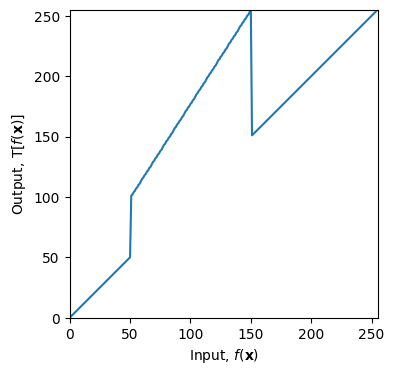

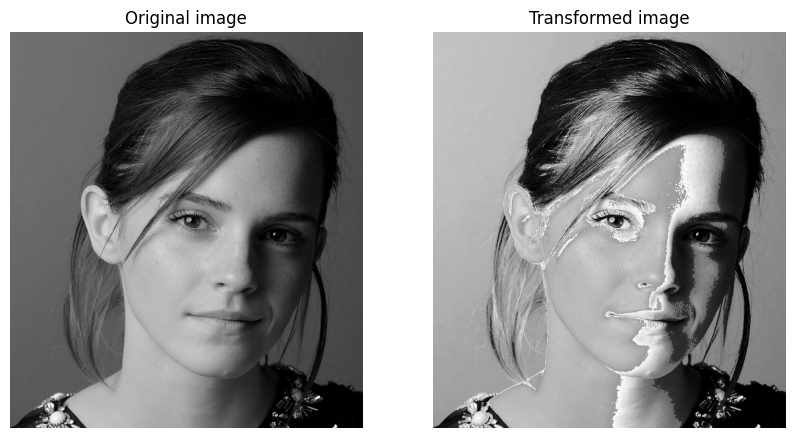

In [66]:
##Question 01

arr = np.array([(50,50), (50,100), (150,255), (150,150)])
t1 = np.linspace(0, arr[0,1], arr[0,0]+1 -0).astype("uint8")
t2 = np.linspace(arr[1,1]+1, arr[2,1], arr[2,0] -arr[1,0]).astype("uint8")
t3 = np.linspace(arr[3,1]+1, 255, 255 -arr[3,0]).astype("uint8")

transform = np.concatenate((t1,t2), axis = 0).astype("uint8")
transform = np.concatenate((transform,t3), axis = 0).astype("uint8")

#Display intensity transformation
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(transform)
ax.set_xlabel("Input, $f(\mathbf{x})$")
ax.set_ylabel("Output, $\mathrm{T}[f(\mathbf{x})]$")
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect("equal")
plt.savefig("transform.png")
plt.show()

img_orig = cv.imread("C:\Python311\cv\Scripts\Images\emma.jpg", cv.IMREAD_GRAYSCALE)

#Applying intensity transformation
image_transformed = cv.LUT(img_orig, transform)

#Display images
fig2, axes = plt.subplots(1,2,figsize=(10,8))
axes[0].imshow(img_orig, cmap="gray")
axes[0].set_title("Original image")
axes[0].axis("off")
axes[1].imshow(image_transformed, cmap="gray")
axes[1].set_title("Transformed image")
axes[1].axis("off")
plt.show()


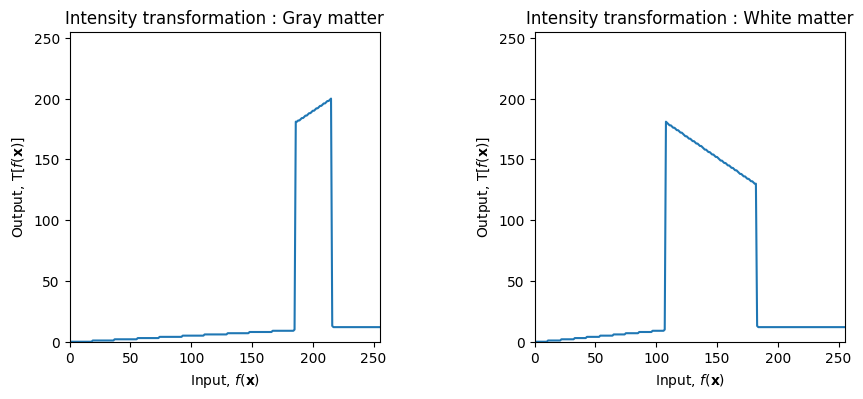

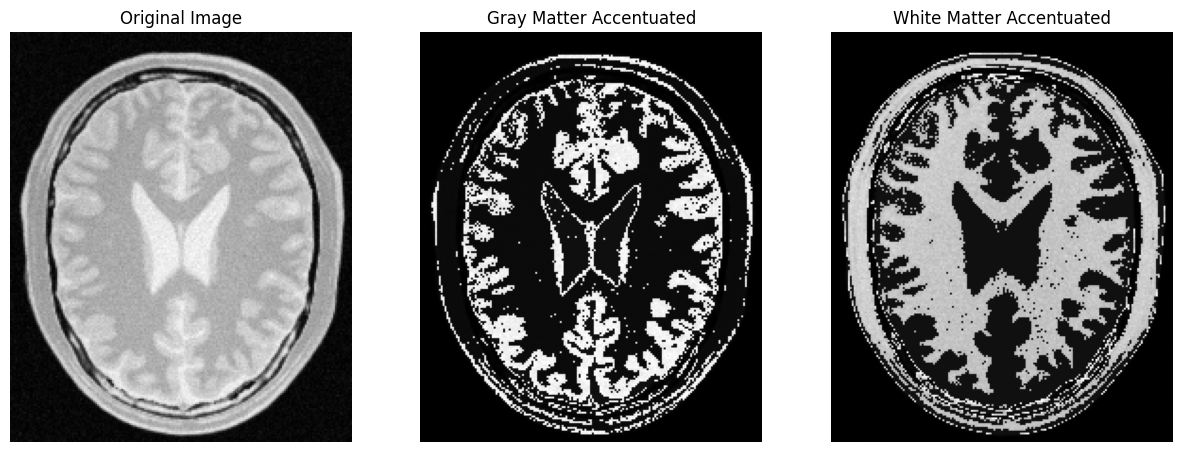

In [305]:
##Question 02

## Brain proton slice gray matter and white matter accentuation

img_orig = cv.imread("C:\Python311\cv\Scripts\Images\BrainProtonDensitySlice9.png", cv.IMREAD_GRAYSCALE)

tran_imageArray = [] # array to store transformed images

arr_1 = np.array([(185,10), (185,180), (215,200), (215,12),(255,12)]) #Define points on intensity transformation plot of gray matter
arr_2 = np.array([(107,10), (107,180), (182,130), (182,12),(255,12)]) #Define points on intensity transformation plot of white matter
Arrays = [arr_1 , arr_2]

#Display intensity transformation plots
fig, ax = plt.subplots(1,2, figsize=(10,10))
fig.subplots_adjust(hspace=0.8, wspace=0.5)

for i in range (0,2):
    arr = Arrays[i]
    t1 = np.linspace(0, arr[0,1], arr[0,0]+1 -0).astype("uint8")
    t2 = np.linspace(arr[1,1]+1, arr[2,1], arr[2,0] -arr[1,0]).astype("uint8")
    t3 = np.linspace(arr[3,1]+1, arr[4,1], arr[4,0] -arr[3,0]).astype("uint8")

    #Create transformation
    transform = np.concatenate((t1,t2), axis = 0).astype("uint8")
    transform = np.concatenate((transform,t3), axis = 0).astype("uint8")

    tran_imageArray.append(transform[img_orig]) #Applying intensity transformation

    #plot the transformation
    ax[i].plot(transform)
    ax[i].set_xlabel("Input, $f(\mathbf{x})$")
    ax[i].set_ylabel("Output, $\mathrm{T}[f(\mathbf{x})]$")
    ax[i].set_xlim(0,255)
    ax[i].set_ylim(0,255)
    ax[i].set_aspect("equal")

ax[0].set_title("Intensity transformation : Gray matter", fontsize=(12))
ax[1].set_title("Intensity transformation : White matter", fontsize=(12))
plt.savefig("transform.png")
plt.show()


#Display the original image and transformed images
figure, axis = plt.subplots(1,3, figsize=(15,15))

axis[0].imshow(img_orig, cmap="gray")
axis[0].set_title("Original Image", fontsize=(12))
axis[0].axis("off")

axis[1].imshow(tran_imageArray[0], cmap="gray")
axis[1].set_title("Gray Matter Accentuated", fontsize=(12))
axis[1].axis("off")

axis[2].imshow(tran_imageArray[1], cmap="gray")
axis[2].set_title("White Matter Accentuated", fontsize=(12))
axis[2].axis("off")
plt.show()



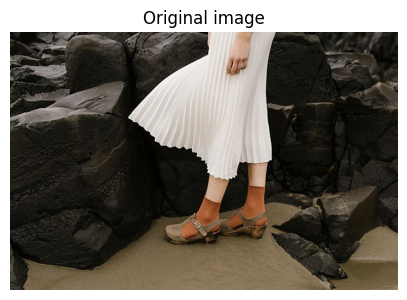

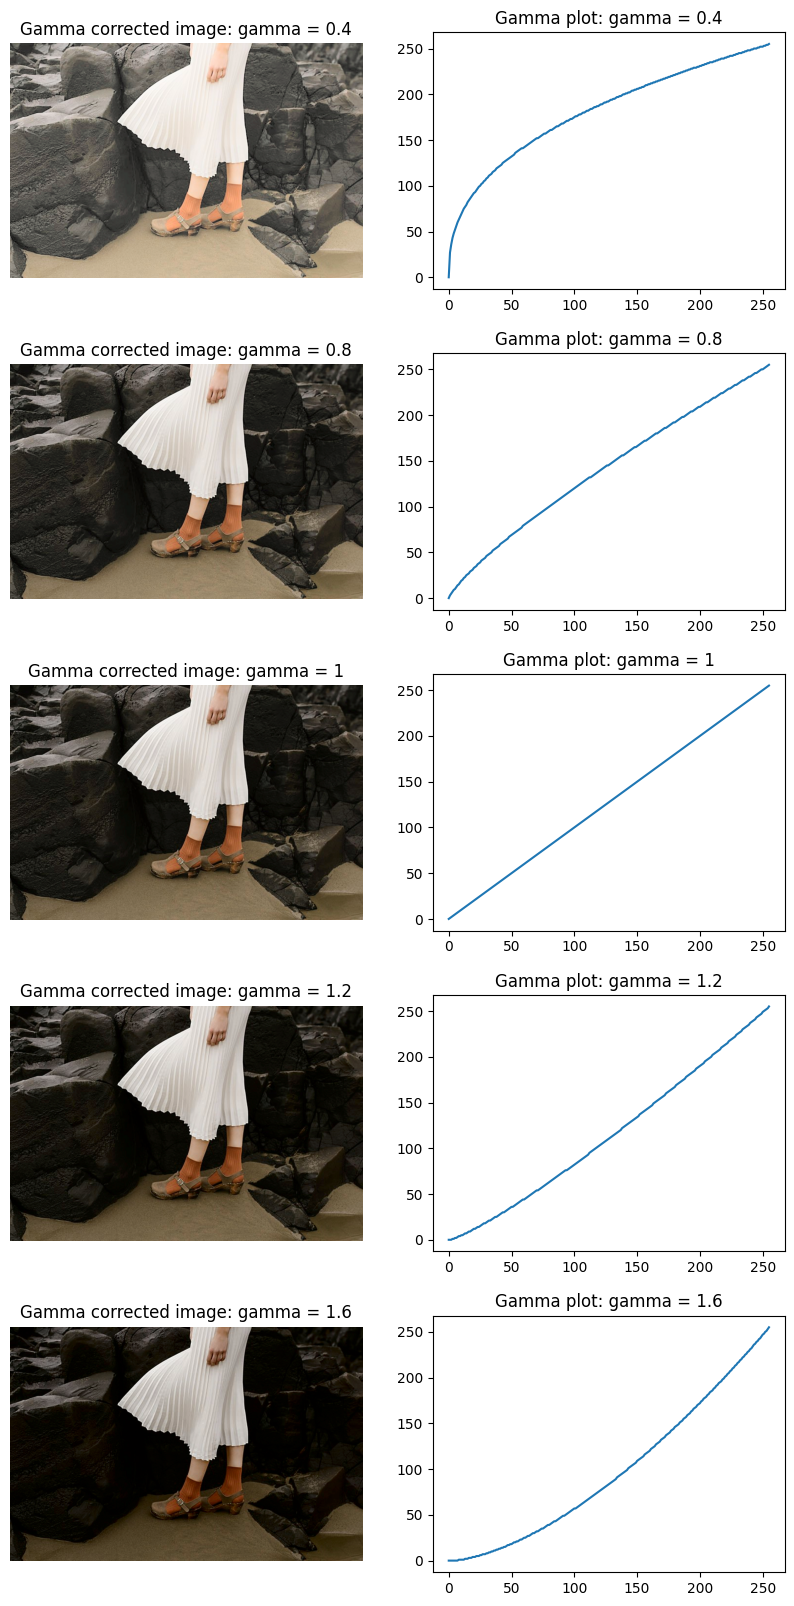

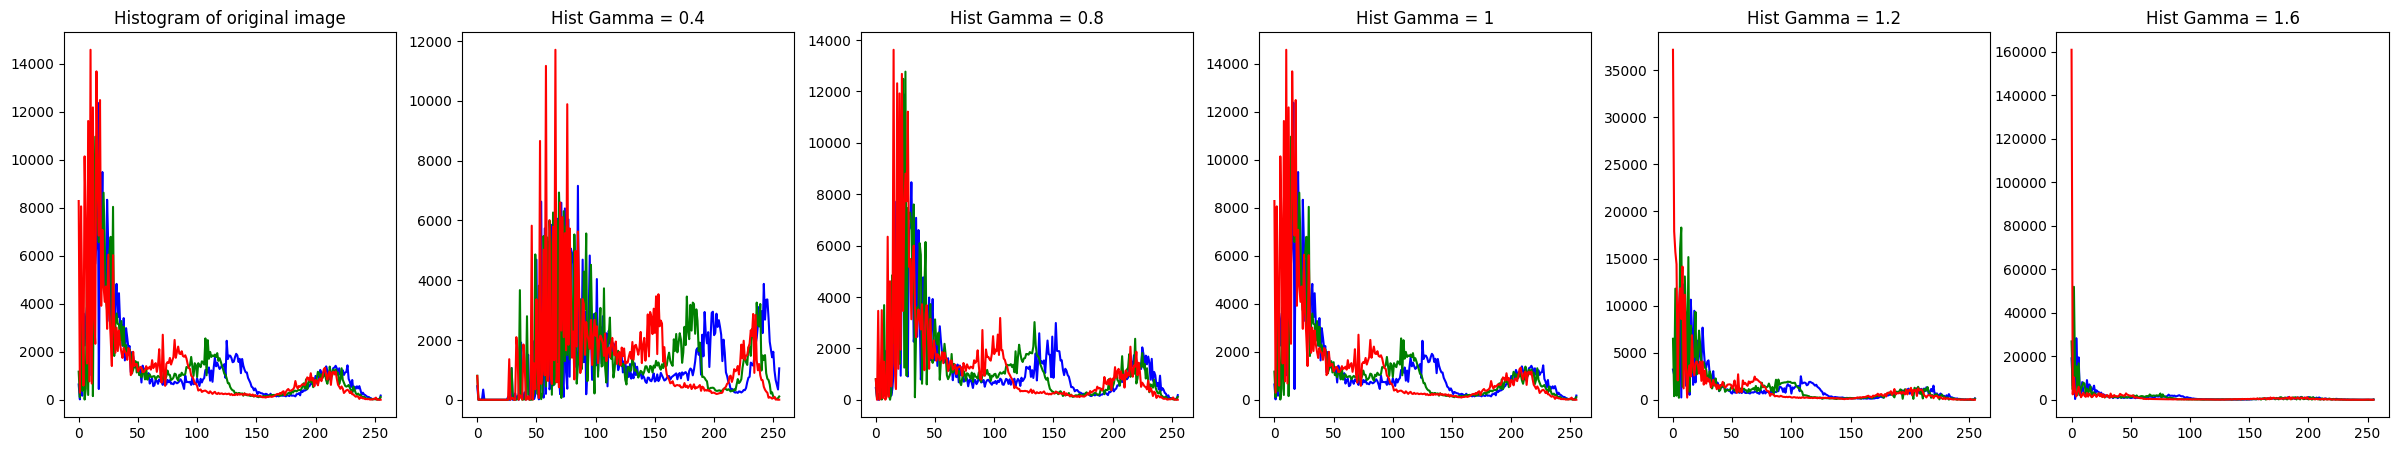

In [121]:
##Question 03

img_orig = cv.imread("C:\Python311\cv\Scripts\Images\highlights_and_shadows.jpg", cv.IMREAD_COLOR) #Read image file

gamma = [0.4,0.8,1,1.2,1.6] #array of gamma values

img_orig = cv.cvtColor(img_orig, cv.COLOR_BGR2LAB) # convert image to LAB color space
L_channel, a_channel, b_channel = cv.split(img_orig) # extracting 3 channels separately
img_orig = cv.cvtColor(img_orig, cv.COLOR_LAB2RGB) 

#Display original image
fig, ax = plt.subplots(figsize = (5,5))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
ax.imshow(img_orig)
ax.set_title("Original image")
ax.axis("off")

f, axes = plt.subplots(5,2,figsize = (10,20))
f.subplots_adjust(hspace=0.25, wspace=0.2)
image_array = []


for i in range (0,len(gamma)):
    LookUp = np.array([(p/255)**(gamma[i])*255 for p in range(0, 256)]).astype(np.uint8)
    L_channel_gamma_corrected = cv.LUT(L_channel, LookUp) #applying gammma correction to L channel
    img_gamma =cv.merge([L_channel_gamma_corrected, a_channel, b_channel]) # merge the three channels after correction
    img_gamma = cv.cvtColor (img_gamma, cv.COLOR_LAB2RGB)
    image_array.append(img_gamma) #array of gamma corrected images

    #display gamma corrected image
    axes[i,0].imshow(img_gamma)
    axes[i,0].set_title("Gamma corrected image: gamma = " +str(gamma[i]), fontsize = 12)
    axes[i,0].axis("off")
    #display gamma correction plot
    axes[i,1].plot(LookUp)
    axes[i,1].set_title("Gamma plot: gamma = " +str(gamma[i]), fontsize = 12)

#display histograms
fig, axarr = plt.subplots(1,6, figsize=(30,5))

color = ("b","g","r")
index = 0

for i,c in enumerate (color):
        hist_orig = cv.calcHist([img_orig], [i], None, [256], [0,256])
        axarr[0].plot(hist_orig, color = c)
        axarr[0].set_title("Histogram of original image")

for index in range (1, len(gamma)+1):
    for i,c in enumerate (color):
        hist_gamma = cv.calcHist([image_array[index-1]], [i], None, [256], [0,256])
        axarr[index].plot(hist_gamma, color = c)
        axarr[index].set_title("Hist Gamma = " + str(gamma[index-1]))
plt.show()

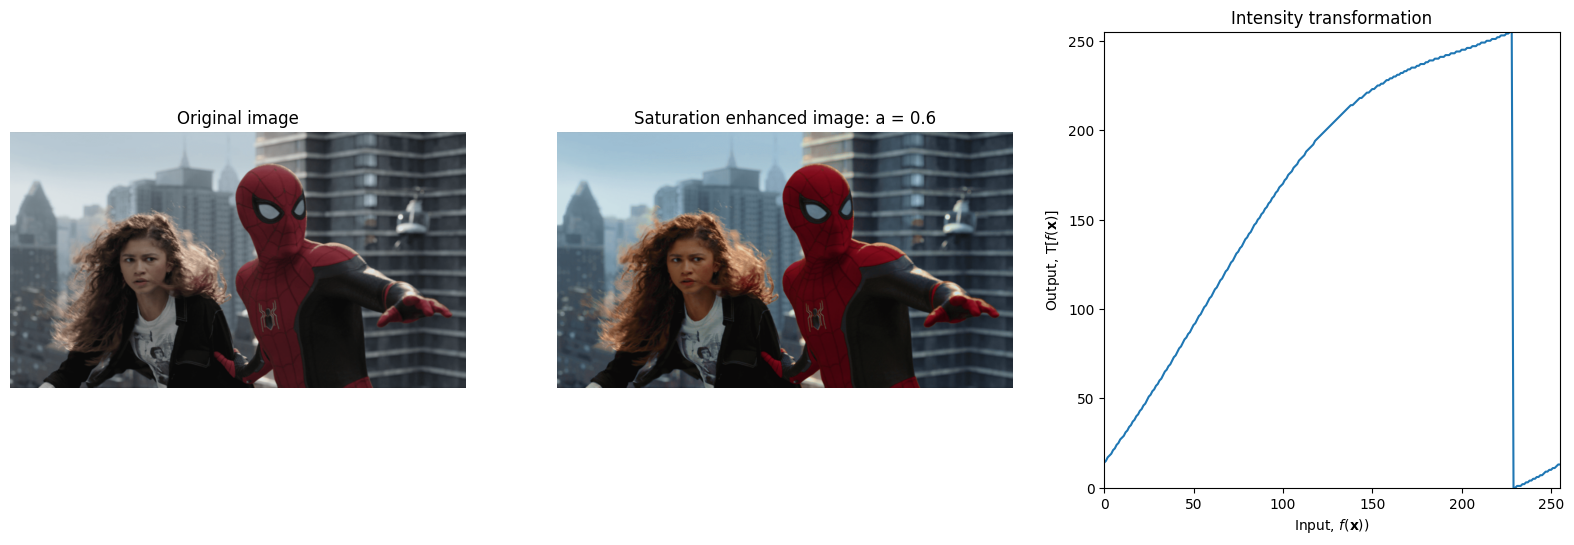

In [125]:
##Question 04

%matplotlib inline
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

img_orig = cv.imread("C:\Python311\cv\Scripts\Images\spider.png", cv.IMREAD_COLOR)
img_orig = cv.cvtColor(img_orig, cv.COLOR_BGR2HSV) # convert image to HSV color space
hue, sat, value = cv.split(img_orig) # extracting 3 planes separately

a =0.6  #Set the value of a such that a is an element of [0,1]
sigma =70
func_generator = ((x + (a*128)* np.exp((-(x - 128)**2) / (2*sigma**2))) for x in range(0,256))
func = np.fromiter(func_generator, np.uint8)
saturation_corrected = cv.LUT(sat , np.minimum(func, 255)) #applying saturation correction to saturation plane

sat_enhanced =cv.merge([hue, saturation_corrected, value]) # merge the three planes after correction

img_orig = cv.cvtColor(img_orig, cv.COLOR_HSV2RGB)
sat_enhanced = cv.cvtColor (sat_enhanced, cv.COLOR_HSV2RGB)

f, axarr = plt.subplots(1,3,figsize = (20,20))
f.subplots_adjust(hspace=0.5, wspace=0.2)

axarr[0].imshow(img_orig)
axarr[0].set_title("Original image")
axarr[0].axis("off")
axarr[1].imshow(sat_enhanced)
axarr[1].set_title("Saturation enhanced image: a = " + str(a))
axarr[1].axis("off")
axarr[2].plot(np.minimum(func, 255))
axarr[2].set_xlabel("Input, $f(\mathbf{x})$)")
axarr[2].set_ylabel("Output, $\mathrm{T}[f(\mathbf{x})]$")
axarr[2].set_title ("Intensity transformation")
axarr[2].set_xlim(0,255)
axarr[2].set_ylim(0,255)
axarr[2].set_aspect("equal")
plt.show()



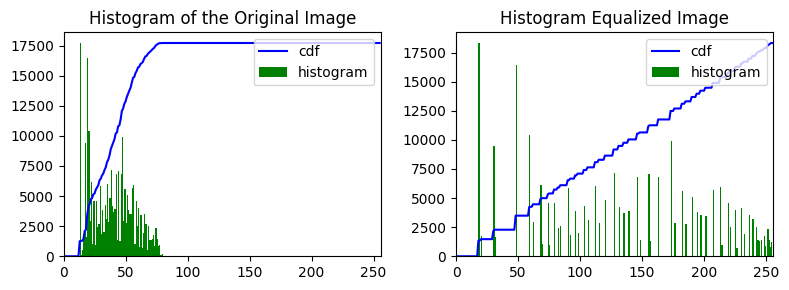

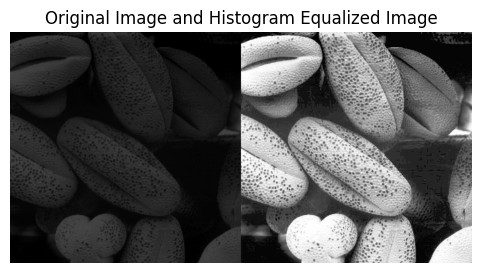

In [150]:
##Question 05

image = cv.imread("C:/Python311/cv/Scripts/Images/shells.tif", cv.IMREAD_GRAYSCALE)

#function to perform histogram equalization
def hist_equalize(im):
    if (im is None):
        print("Empty input!") 
    elif (len(im.shape) == 3):
        gray_im = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
    else:
        gray_im = im

    hist, bins = np.histogram(gray_im.ravel(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf / cdf[-1]
    equalized_im = np.interp(im, bins[:-1], cdf_normalized * 255).astype("uint8")

    return equalized_im

# Calculate histogram of original image
hist, bins = np.histogram(image.ravel(), 256, [0, 256])
cdf = hist.cumsum()
normalized_cdf = cdf * hist.max() / cdf.max()

# Display histogram and cdf of original image
plt.figure(figsize=(8, 3))
plt.subplot(121)
plt.plot(normalized_cdf, color="b")
plt.hist(image.flatten(), 256, [0, 256], color="g")
plt.xlim([0, 256])
plt.legend(("cdf", "histogram"), loc="upper right")
plt.title("Histogram of the Original Image")

equ = hist_equalize(image)  # Perform histogram equalization

# Calculate histogram of histogram equalized image
hist, bins = np.histogram(equ.ravel(), 256, [0, 256])
cdf = hist.cumsum()
normalized_cdf = cdf * hist.max() / cdf.max()

# Display histogram and cdf of histogram equalized image
plt.subplot(122)
plt.plot(normalized_cdf, color="b")
plt.hist(equ.flatten(), 256, [0, 256], color="g")
plt.xlim([0, 256])
plt.legend(("cdf", "histogram"), loc="upper right")
plt.title("Histogram Equalized Image")

plt.tight_layout()
plt.show()

# Display original image and histogram equalized image
res = np.hstack((image, equ))
plt.figure(figsize=(8, 3))
plt.axis("off")
plt.title("Original Image and Histogram Equalized Image")
plt.imshow(res, cmap="gray")
plt.show()



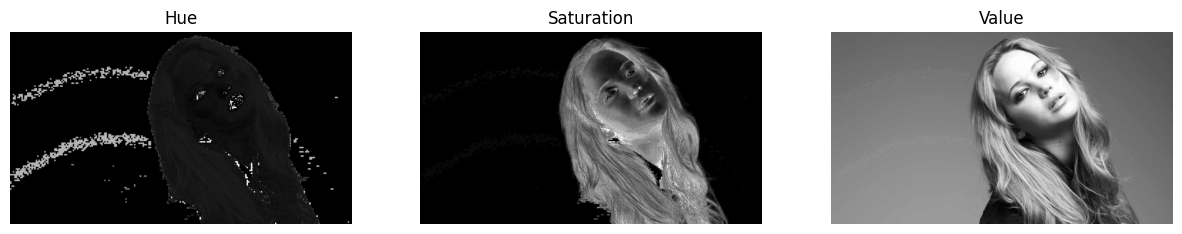

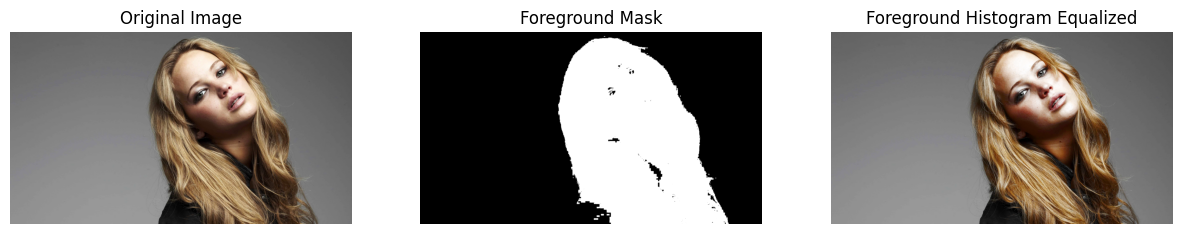

In [151]:
##Question 06

image = cv.imread('C:\Python311\cv\Scripts\Images\jeniffer.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# Split into HSV channels
hue, saturation, value = cv.split(image)

fig, axis = plt.subplots(1,3, figsize = (15,15))
axis[0].imshow(hue, cmap = "gray")
axis[0].set_title("Hue")
axis[0].axis("off")

axis[1].imshow(saturation, cmap = "gray")
axis[1].set_title("Saturation")
axis[1].axis("off")

axis[2].imshow(value, cmap = "gray")
axis[2].set_title("Value")
axis[2].axis("off")
plt.show()

threshold_value = 15  # Threshold to obtain the foreground mask
_, mask = cv.threshold(saturation, threshold_value, 255, cv.THRESH_BINARY)

foreground = cv.bitwise_and(saturation, saturation, mask=mask) # Get the foreground
histogram = cv.calcHist([foreground], [0], mask, [256], [0, 256])

cumulative_histogram = np.cumsum(histogram)

# Histogram equalization
equalized_value = (cumulative_histogram[saturation.flatten()] / cumulative_histogram[-1]) * 255
equalized_value = equalized_value.astype(np.uint8)

equalized_foreground = equalized_value.reshape(saturation.shape)

background = cv.bitwise_and(saturation, saturation, mask=~mask)  # Extract the background
result_value = cv.add(equalized_foreground, background) # Merge the equalized foreground and background

result_image = cv.merge((hue, result_value, value)) # Merge H, S, and V planes

result_image_bgr = cv.cvtColor(result_image, cv.COLOR_HSV2BGR)

# Display the original image, mask, and image with histogram-equalized foreground

f, ax =plt.subplots(1,3,figsize=(15,20))
ax[0].imshow(cv.cvtColor(image, cv.COLOR_HSV2RGB))
ax[0].axis("off")
ax[0].set_title("Original Image", fontsize=12)

ax[1].imshow(mask, cmap="gray")
ax[1].axis("off")
ax[1].set_title("Foreground Mask", fontsize=12)

ax[2].imshow(cv.cvtColor(result_image_bgr, cv.COLOR_BGR2RGB))
ax[2].axis("off")
ax[2].set_title("Foreground Histogram Equalized", fontsize=12)
plt.show()

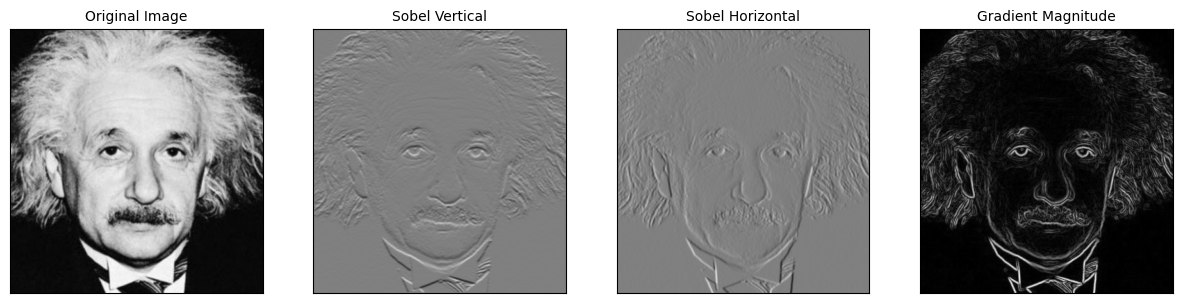

In [174]:
##Question 07
#Part(a)

#Sobel filtering using filter2D function

original = cv.imread("C:\Python311\cv\Scripts\Images\einstein.png",cv.IMREAD_GRAYSCALE)

kernel_1 = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]) # kernel for sobel vertical
kernel_2 = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) # kernel for sobel horizontal

sobelVertical_image = cv.filter2D(original, cv.CV_64F, kernel_1) # Sobel vertical filter
sobelHorizontal_image = cv.filter2D(original, cv.CV_64F, kernel_2) # Sobel horizontal filter
grad_mag = np.sqrt(sobelVertical_image**2 + sobelHorizontal_image**2)

fig, axes = plt.subplots(1,4, sharex = "all", sharey = "all", figsize = (15,15))

axes[0].imshow(original, cmap = "gray")
axes[0].set_title("Original Image", fontsize = 10)
axes[0].set_xticks([]), axes[0].set_yticks([])

axes[1].imshow(sobelVertical_image,cmap = "gray",vmin= -1020, vmax=1020)
axes[1].set_title("Sobel Vertical", fontsize = 10)
axes[1].set_xticks([]), axes[1].set_yticks([])

axes[2].imshow(sobelHorizontal_image,cmap = "gray", vmin= -1020, vmax=1020)
axes[2].set_title("Sobel Horizontal", fontsize = 10)
axes[2].set_xticks([]), axes[2].set_yticks([])

axes[3].imshow(grad_mag, cmap="gray")
axes[3].set_title("Gradient Magnitude", fontsize = 10)
axes[3].set_xticks([]), axes[2].set_yticks([])

plt.show()


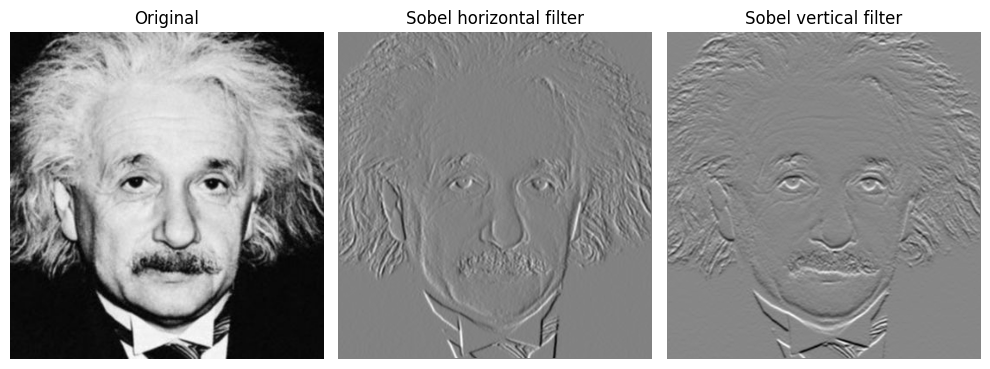

In [306]:
#Part(b)

import math

#Function to perform image filter
def filter(image, kernel):
    assert kernel.shape[0] % 2 == 1 and kernel.shape[1] % 2 == 1
    k_hh, k_hw = math.floor(kernel.shape[0] / 2), math.floor(kernel.shape[1] / 2)
    h, w = image.shape
    image_float = cv.normalize(image.astype('float'), None, 0.0, 1.0, cv.NORM_MINMAX)
    result = np.zeros(image.shape, 'float')

    for m in range(k_hh, h - k_hh):
        for n in range(k_hw, w - k_hw):
            result[m, n] = np.dot(image_float[m - k_hh: m + k_hh + 1, n - k_hw: n + k_hw + 1].flatten(),
                                  kernel.flatten())
    return result

img = cv.imread('C:\Python311\cv\Scripts\Images\einstein.png', cv.IMREAD_GRAYSCALE)

#Define kernel
kernel_1 = np.array([[-1, 0, 1], [-4, 0, 4], [-1, 0, 1]], dtype='float') #Sobel horizontal
kernel_2 = np.array([[-1, -4, -1], [0, 0, 0], [1, 4, 1]], dtype='float')  #Sobel vertical

# Display the original and filtered images
fig, axarr = plt.subplots(1, 3, figsize=(10, 10))

#Filter the image
Sobel_h = filter(img, kernel_1)
Sobel_v = filter(img, kernel_2)

#Display original image and results
axarr[0].imshow(img, cmap="gray")
axarr[0].set_title('Original')
axarr[0].axis("off")

axarr[1].imshow(Sobel_h, cmap="gray")
axarr[1].set_title('Sobel horizontal filter')
axarr[1].axis("off")

axarr[2].imshow(Sobel_v, cmap="gray")
axarr[2].set_title('Sobel vertical filter')
axarr[2].axis("off")

plt.tight_layout()
plt.show()


(-0.5, 363.5, 379.5, -0.5)

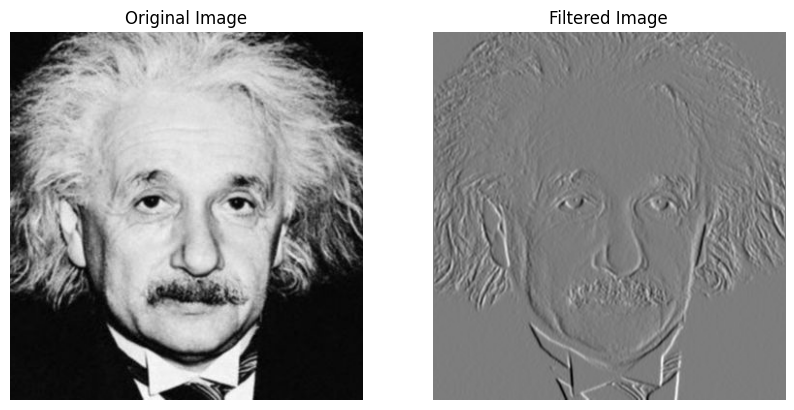

In [33]:
#Part(c)

##Fastened sobel
original = cv.imread("C:\Python311\cv\Scripts\Images\einstein.png",cv.IMREAD_GRAYSCALE)

def fastened_sobel (image):
    row = np.array([[1, 0, -1]])
    column = np.array([[1],[2],[1]])

    row_filtered = cv.filter2D(image, ddepth = cv.CV_64F, kernel=row)
    filtered_image = cv.filter2D(row_filtered, ddepth = cv.CV_64F, kernel=column)

    # Normalize the filtered image
    filtered_image = cv.normalize(filtered_image, None, 0, 255, cv.NORM_MINMAX).astype("uint8")
    
    return filtered_image

# Apply Sobel filtering using decomposition
filtered_image = fastened_sobel(original)
original = cv.cvtColor(original, cv.COLOR_BGR2RGB)
filtered_image = cv.cvtColor(filtered_image, cv.COLOR_BGR2RGB)

# Display the original and filtered images
fig, axis = plt.subplots(1,2,figsize = (10,10))
axis[0].imshow(original)
axis[0].set_title("Original Image")
axis[0].axis("off")
axis[1].imshow(filtered_image)
axis[1].set_title("Filtered Image")
axis[1].axis("off")


    

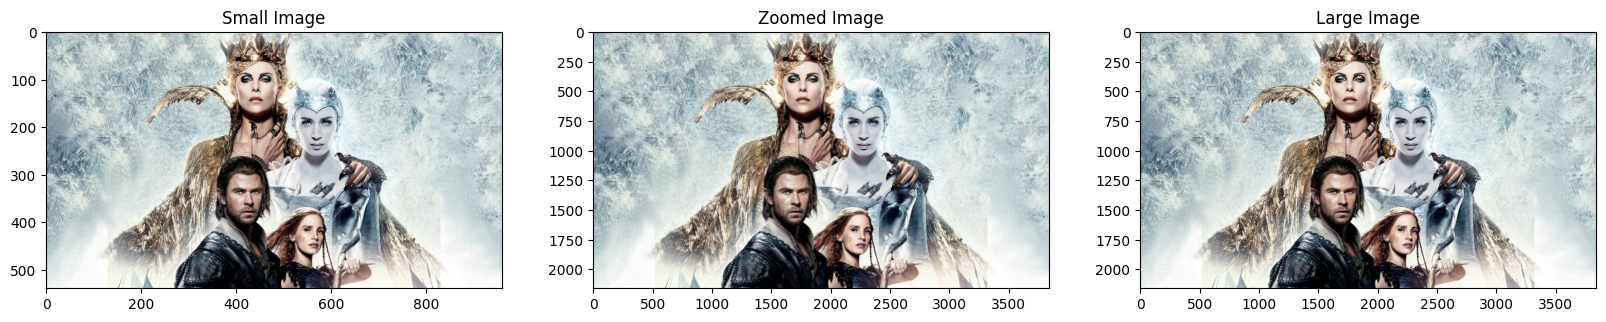

2529.264062379437


In [4]:
##Question 08

#Zoom function
def nn_zoom(image, s):
    if (s>0 and s<=10):
        row = image.shape[0] * s
        column = image.shape[1] * s
        zoomed_Img = np.zeros((row, column, 3), dtype = np.uint8)
        for i in range(row):
            for j in range(column):
                    zoomed_Img[i, j] = image[round(i/s - 0.5), round(j/s - 0.5)]
                    
        return zoomed_Img
    else:
        print("Invalid scaling factor")
        return image

original = cv.imread("C:\Python311\cv\Scripts\Images\zooming\im04small.png") #Path of the small image
large_im = cv.imread("C:\Python311\cv\Scripts\Images\zooming\im04.png") #Path of the large image

assert original is not None

scale_fac = int(input("Enter the scaling integer :"))
zoomed = nn_zoom(original, scale_fac)

cv.imshow('Image', original)
cv.waitKey(0)
cv.imshow('Image', zoomed)
cv.waitKey(0)
cv.destroyAllWindows()

fig, ax = plt.subplots(1, 3, figsize=(20, 10))

#ax[0].imshow(cv.cvtColor(original[0:70, 0:100], cv.COLOR_BGR2RGB))
ax[0].imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
ax[0].set_title("Small Image")

#ax[1].imshow(cv.cvtColor(zoomed[0:75*4, 0:100*4], cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(zoomed, cv.COLOR_BGR2RGB))
ax[1].set_title("Zoomed Image")

#ax[2].imshow(cv.cvtColor(large_im[0:75*4, 0:100*4], cv.COLOR_BGR2RGB))
ax[2].imshow(cv.cvtColor(large_im, cv.COLOR_BGR2RGB))
ax[2].set_title("Large Image")

plt.show()

#Function to calculate normalized sum of squared differences
def Sum_squaredDif(image1,image2):
    value = (np.sum((image1.astype("float")-image2.astype("float"))**2))/float(image1.shape[0]*image1.shape[1])
    return value

#calculate normalized sum of squared difference
ssd = Sum_squaredDif(large_im,zoomed)
print(ssd)

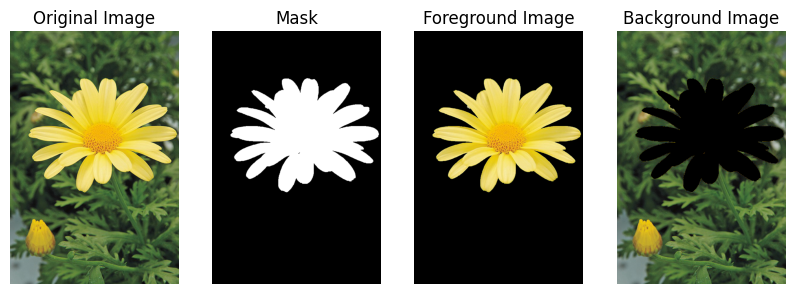

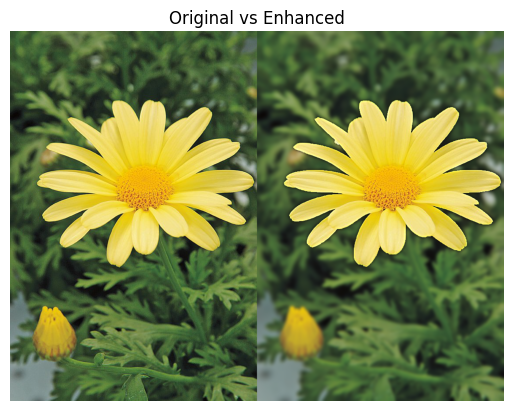

In [30]:
##Question 09

#Focus level adusting through segmetation

original_image = cv.imread("C:\Python311\cv\Scripts\Images\daisies.png", cv.IMREAD_COLOR)
mask = np.zeros(original_image.shape[:2], dtype = np.uint8) # create a mask array of zeros, with dimension equal to the original image 

rect = cv.selectROI (original_image) #Region of interest selection using a rectangle
cv.destroyAllWindows()

# create two numpy arrays of zeros for background and foreground
bgd_model = np.zeros((1,65), np.float64)
fgd_model = np.zeros((1,65), np.float64)

cv.grabCut(original_image, mask, rect, bgd_model, fgd_model, 5, cv.GC_INIT_WITH_RECT) #Segmentation of the image

modified_mask = np.where((mask == 2) | (mask == 0), 0, 1).astype("uint8") # creates a binary mask
foreground_image = cv.bitwise_and(original_image, original_image, mask= modified_mask) #Extracts the foreground
background_image = cv.bitwise_and(original_image, original_image, mask = 1 - modified_mask) #Extracts the background

#color convertion to display using matplot
original_image = cv.cvtColor(original_image, cv.COLOR_BGR2RGB)
foreground_image = cv.cvtColor(foreground_image, cv.COLOR_BGR2RGB)
background_image = cv.cvtColor(background_image, cv.COLOR_BGR2RGB)

#display results
fig, axis = plt.subplots(1,4, figsize = (10,10))

axis[0].imshow(original_image, cmap ="gray")
axis[0].set_title ("Original Image", fontsize = 12 )
axis[0].axis("off")

axis[1].imshow(modified_mask, cmap ="gray")
axis[1].set_title ("Mask", fontsize = 12 )
axis[1].axis("off")

axis[2].imshow(foreground_image, cmap ="gray")
axis[2].set_title ("Foreground Image", fontsize = 12 )
axis[2].axis("off")

axis[3].imshow(background_image, cmap ="gray")
axis[3].set_title ("Background Image", fontsize = 12 )
axis[3].axis("off")
plt.show()

blured_bgd = cv.GaussianBlur(background_image, (19,19), 0) #Blur the background of the image
#blured_bgd = cv.blur(background_image, (15,15))
enhanced_image = cv.add(foreground_image,blured_bgd) #merge foreground and modified background

#display original image aong with the modified image
combined_images = np.hstack((original_image, enhanced_image)) 

f, ax = plt.subplots()
ax.imshow(combined_images)
ax.axis("off")
ax.set_title("Original vs Enhanced")
plt.show()